# Ways to Define a Tree

* Trees are hierarchical
* All of the children of one node are independent of the children of another node
* Each leaf node is unique

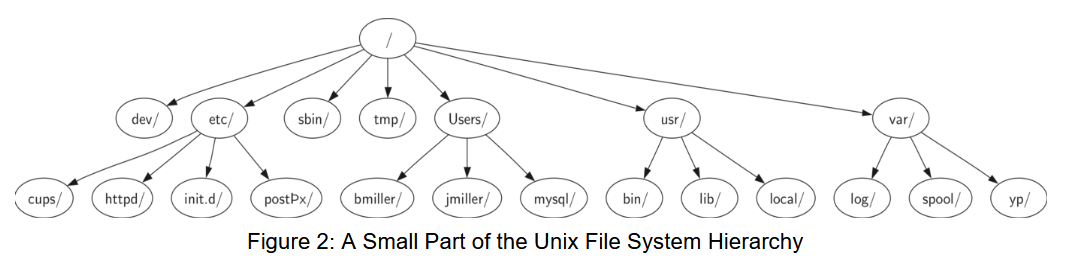

###  Vocabulary

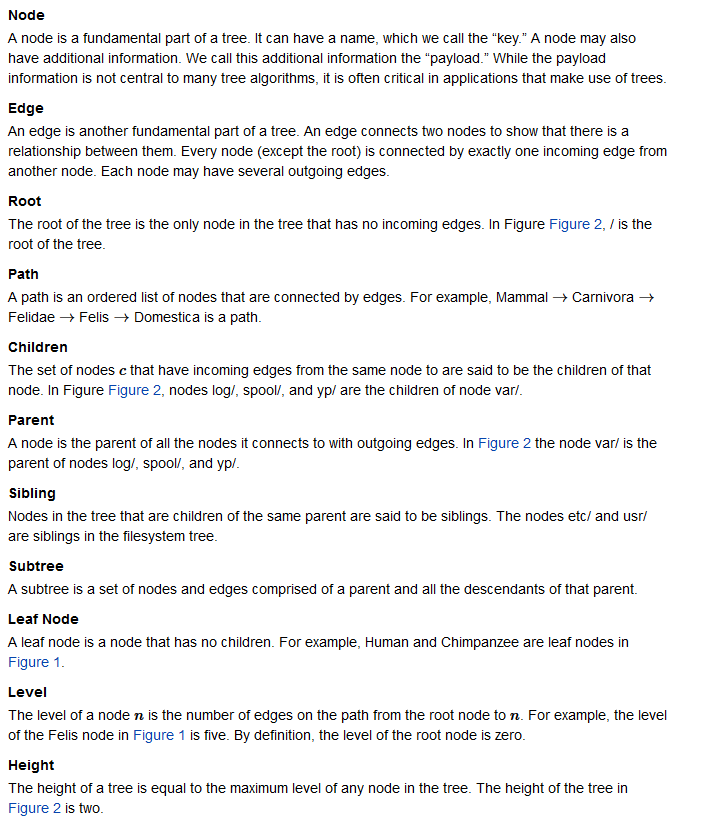

### Definitions of a Tree

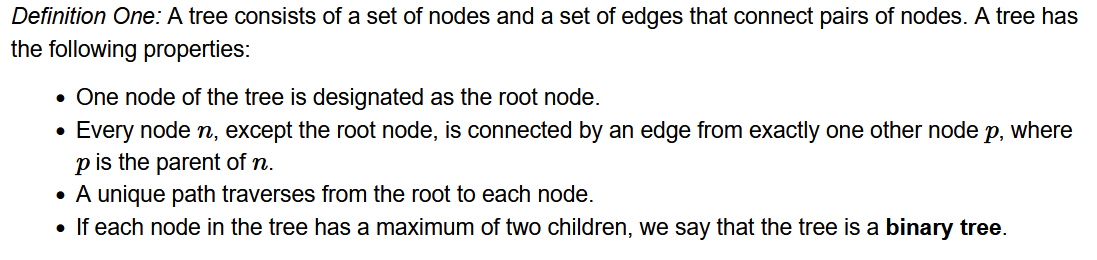

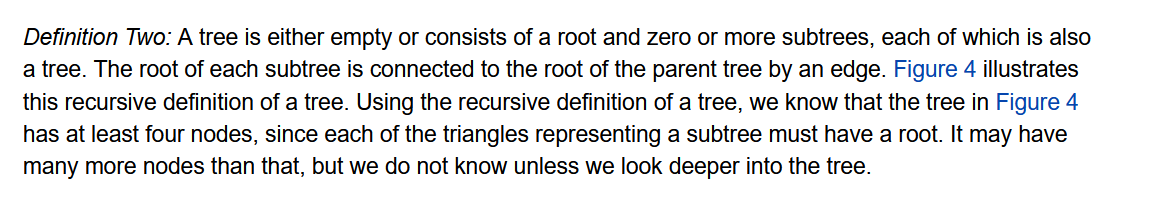

In [1]:
def BinaryTree(r):
    return [r,[],[]]

def LeftInsertion(root, newBranch):
    t = root.pop(1)
    
    if len(t) > 1:
        root.insert(1,[newBranch,t,[]])
        
    else:
        root.insert(1,[newBranch,[],[]])
    
    return root

def RightInsertion(root,newBranch):
    
    t = root.pop(2)
    
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
        
    else:
        root.insert(2,[newBranch,[],[]])
        
    return root
        
        
def getRootVal(root):
    return root[0]

def setRootVal(root,newVal):
    root[0] = newVal

def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

In [21]:
bt = BinaryTree('a')
LeftInsertion(bt,'b')
RightInsertion(bt,'c')
RightInsertion(getLeftChild(bt),'d')
RightInsertion(getRightChild(bt),'f')
LeftInsertion(getRightChild(bt),'e')
print(bt)

['a', ['b', [], ['d', [], []]], ['c', ['e', [], []], ['f', [], []]]]


### Nodes and References

In [2]:
class BinaryTree:
    
    def __init__(self,rootObj=None):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
        
    def __str__(self):
        return ('node: {}, leftchild: {}, rightchild: {}'.format(self.key,self.leftChild,self.rightChild))

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key


r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())


a
None
node: b, leftchild: None, rightchild: None
b
node: c, leftchild: None, rightchild: None
c
hello


In [13]:
test = BinaryTree()

### Tree Parsing

In [15]:
def parser(operation):
    
    tree = BinaryTree()
    
    treelevel = [tree]
        
    for i in operation:
        if i == '(':
            treelevel[-1].insertLeft(BinaryTree())
            treelevel.append(treelevel[-1].getLeftChild())
        elif i in ['+','-','/','*']:
            treelevel[-1].setRootVal(i)
            treelevel[-1].insertRight(BinaryTree())
            treelevel.append(treelevel[-1].getRightChild())
        elif i == ')':
            treelevel.pop()

        else:
            treelevel[-1].setRootVal(i)
            treelevel.pop()



    return tree
                    
                

In [39]:
test = parser('((7+3)*(5-2))')

In [41]:
print(test)

node: *, leftchild: node: +, leftchild: node: 7, leftchild: None, rightchild: None, rightchild: node: 3, leftchild: None, rightchild: None, rightchild: node: -, leftchild: node: 5, leftchild: None, rightchild: None, rightchild: node: 2, leftchild: None, rightchild: None


### Tree Traversals

##### preorder

root -> left subtree -> right subtree

 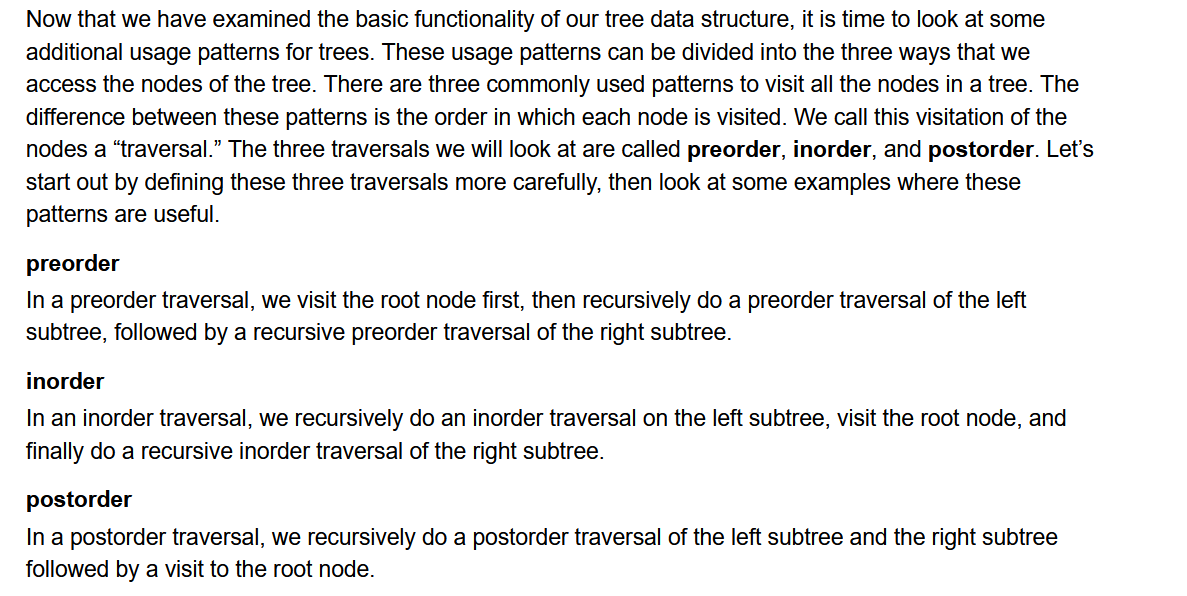
    
    

In [44]:
def preorder(tree):
    
    if tree:
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())

In [45]:
test = BinaryTree('Book')

In [46]:
test.insertLeft('Chapter 1')
test.insertRight('Chapter 2')
test.getLeftChild().insertLeft('Section 1.1')
test.getLeftChild().insertRight('Section 1.2')
test.getLeftChild().getRightChild().insertLeft('Section 1.2.1')
test.getLeftChild().getRightChild().insertRight('Section 1.2.2')
test.getRightChild().insertLeft('Section 2.1')
test.getRightChild().insertRight('Section 2.2')
test.getRightChild().getRightChild().insertLeft('Section 2.2.1')
test.getRightChild().getRightChild().insertRight('Section 2.2.2')



#### preorder 

In [47]:
preorder(test)

Book
Chapter 1
Section 1.1
Section 1.2
Section 1.2.1
Section 1.2.2
Chapter 2
Section 2.1
Section 2.2
Section 2.2.1
Section 2.2.2


##### inorder

In [50]:
def inorder(tree):
    
    if tree.getLeftChild():
        inorder(tree.getLeftChild())
    
    print(tree.getRootVal())
    
    if tree.getRightChild():
        inorder(tree.getRightChild())

    

In [51]:
inorder(test)

Section 1.1
Chapter 1
Section 1.2.1
Section 1.2
Section 1.2.2
Book
Section 2.1
Chapter 2
Section 2.2.1
Section 2.2
Section 2.2.2


#### postorder

In [54]:
def postorder(tree):
    if tree:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())

In [55]:
postorder(test)

Section 1.1
Section 1.2.1
Section 1.2.2
Section 1.2
Chapter 1
Section 2.1
Section 2.2.1
Section 2.2.2
Section 2.2
Chapter 2
Book


# Priority Queues with Binary Heaps

Priority queue is a type of queue. It has the same proprerty of dequeing by removing an item from the front. However, in a priority queue the logical order of an item inside the queue is determined by their priority. Thus, when you enqueue a new item on a priority queue, it may move all the way to the front.


The classic way to implement a priority queue is by using binary heaps. Rather than inserting (O(n)) and sorting (O(nlog(n)), binary heaps allow us to enqueue and dequeue in O(log(n))

### basic operations

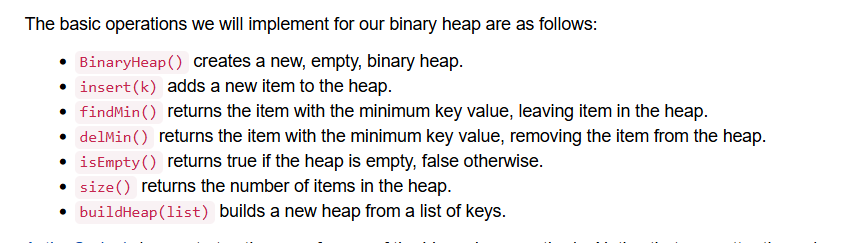

### Structure

To guarantee logarithmic performance, we must keep usage of a balanced tree. A balanced binary tree has roughly the same number of nodes in the left and right subtress of the root. In our heap implementation we keep our tree balanced by creating a complete binary tree (each level has all of its nodes, with exception to the bottom level)

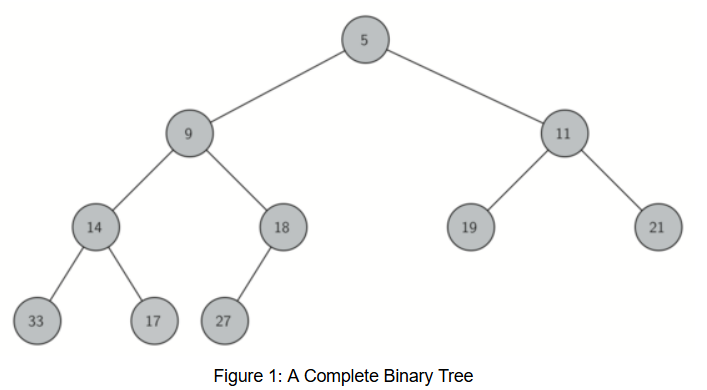

#### The structure property

Because the tree is complete, the left children of a node will always be on position 2p in relation to the p position of the node. also, the right child will always be at position 2p+1. To find the parent of any node of the tree, simply use pythons integer division

### Heap Order Property

The method that we will use to store items in a heap relies on maintaining the heap order property. The heap order property is as follows: In a heap, for every node x with parent p , the key in p is smaller than or equal to the key in x . Figure 2 also illustrates a complete binary tree that has the heap order property.

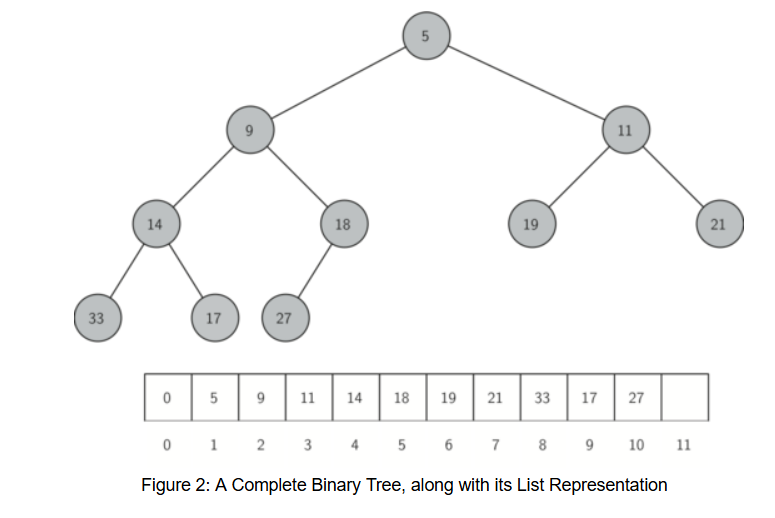

Because the heap is a complete binary tree, any nodes past the halfway point will be leaves and therefore have no children. 

### Inserting

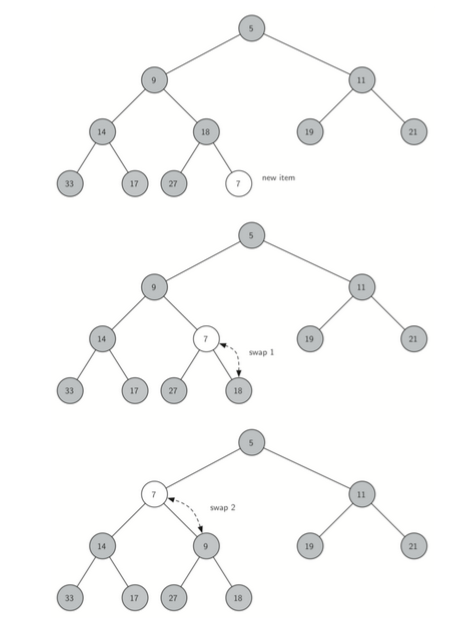

### Deleting

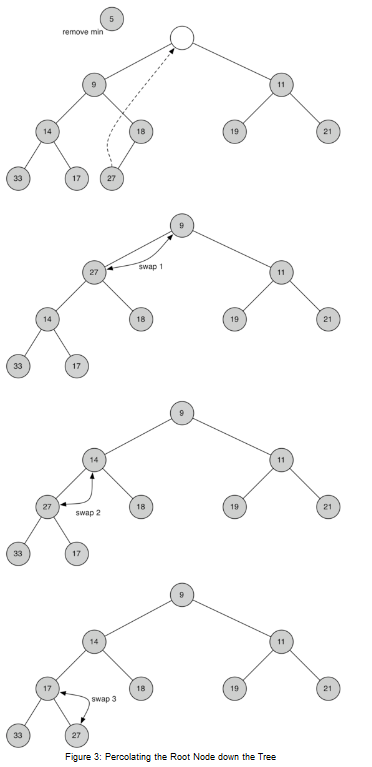

In [62]:
class BinHeap:
    
    def __init__(self):
        self.heapList = [0]
        self.size = 0
    
    
    ### Inserting 
    
    
    def percUp(self):
        i = self.size
        
        while i//2 > 0:
            if self.heapList[i//2] > self.heapList[i]:
                self.heapList[i//2], self.heapList[i] = self.heapList[i], self.heapList[i//2]
            
            else:
                break
        
            i//=2
        
    def insert(self,item):
        if self.size == 0:
            self.size +=1 
            self.heapList.append(item)
        
        else:
            self.heapList.append(item)
            self.size += 1
            self.percUp()
    
    
    ### delMin
    
    def percDown(self):
        
        i = 1
        
        while (i*2) + 1 <= self.size:
            if self.heapList[i] > self.heapList[i*2]:
                self.heapList[i*2], self.heapList[i] = self.heapList[i], self.heapList[i*2]
            
            elif self.heapList[i] > self.heapList[(i*2)+1]:
                self.heapList[(i*2)+1], self.heapList[i] = self.heapList[i], self.heapList[(i*2)+1]
                
            else:
                break
            
            i*=2
            
    def delMin(self):
        self.heapList[1] = self.heapList[self.size]
        self.size -= 1
        self.heapList.pop()
        self.percDown()

        
        
        
    def listheap(self):
        return self.heapList
        
                
                
            

In [76]:
a = BinHeap()

for i in [5,9,11,14,18,19,21,33,17,27]:
    a.insert(i)

a.insert(7)

a.heapList

[0, 5, 7, 11, 14, 9, 19, 21, 33, 17, 27, 18]

In [77]:
a = BinHeap()

for i in [5,9,11,14,18,19,21,33,17,27]:
    a.insert(i)

a.delMin()

a.heapList

[0, 9, 14, 11, 17, 18, 19, 21, 33, 27]

### Build heap from a list of keys

In [65]:
class BinHeap:
    
    def __init__(self):
        self.heapList = [0]
        self.size = 0
    
    
    ### Inserting 
    
    
    def percUp(self):
        i = self.size
        
        while i//2 > 0:
            if self.heapList[i//2] > self.heapList[i]:
                self.heapList[i//2], self.heapList[i] = self.heapList[i], self.heapList[i//2]
            
            else:
                break
        
            i//=2
        
    def insert(self,item):
        if self.size == 0:
            self.size +=1 
            self.heapList.append(item)
        
        else:
            self.heapList.append(item)
            self.size += 1
            self.percUp()
    
    
    ### delMin
    
    def percDown(self,i = 1):
        
        
        while (i*2) + 1 <= self.size:
            
            if self.heapList[i*2] <=  self.heapList[(i*2)+1]:
                minchild = (i*2)
                
            else:
                minchild = (i*2)+1
            
            if self.heapList[i] > self.heapList[minchild]:
                self.heapList[minchild], self.heapList[i] = self.heapList[i], self.heapList[minchild]

                
            else:
                break
            
            i*=2
            
    def delMin(self):
        self.heapList[1] = self.heapList[self.size]
        self.size -= 1
        self.heapList.pop()
        self.percDown()

        
        
        
    def listheap(self):
        return self.heapList
    
    
    def buildHeap(self, alist):
        
        i = len(alist)//2
        self.size = len(alist)
        self.heapList = [0] + alist[:]
        while i > 0:
            self.percDown(i)
            i-=1
            
                
                
            

In [66]:
test = BinHeap()

In [68]:
test.heapList

[0, 4, 3]

In [30]:
for i in [5,9,11,14,18,19,21,33,17,27]:
    test.insert(i)

In [34]:
test.listheap()

[0, 9, 14, 11, 17, 18, 19, 21, 33, 27]

In [33]:
test.delMin()

# Search Tree Implementation

A Binary Search Tree is another method, like the ADTs hash tables and binary search to map from a key to a value. In this case, we are not necessarily interested in the position of the key in the tree, but rather using the binary tree structure  to provide efficient searching.

### Search Tree Operations

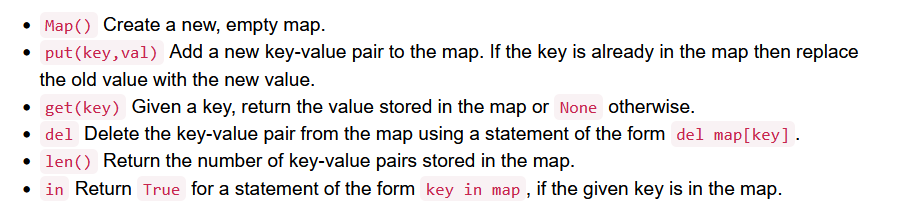

### Search Tree Implementation

Primary property of binary search trees: keys that are less than the parent are found in the left subtree, and keys that are greater thant the parent are found in the right subtree (<b>bst property</b>) 

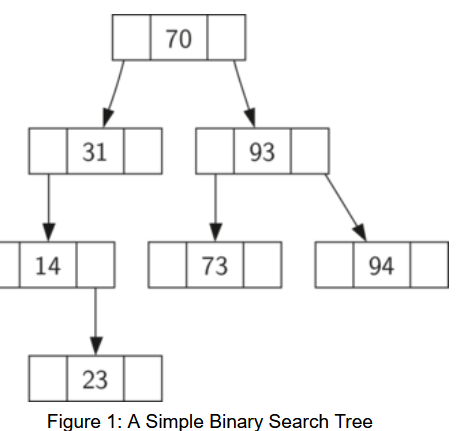

First, we define a BinarySearchTree object:
    

In [131]:
class BinarySearchTree:

    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return self.size

    def __len__(self):
        return self.size

    def __iter__(self):
        return self.root.__iter__()
    

    def put(self,key,val):

        if not self.root:
            self.root = TreeNode(key,val)

        else:
            self._put(key,val,self.root)

        self.size += 1

    def _put(self,key,val,treeNode):

        if key == treeNode.key:
            treeNode.replaceNodeData(key,val,treeNode.leftChild,treeNode.rightChild)
            self.size -=1

        elif key < treeNode.key:
            if treeNode.hasLeftChild():
                self._put(key,val,treeNode.leftChild)
            else:
                treeNode.leftChild = TreeNode(key,val,parent=treeNode)

        else:
            if treeNode.hasRightChild():
                self._put(key,val,treeNode.rightChild)
            else:
                treeNode.rightChild = TreeNode(key,val,parent=treeNode)
                
    def __setitem__(self,k,v):
        self.put(k,v)
        
    def get(self,key):
        
        if self.root:
            
            res = self._get(key,self.root)

            if res:
                return res.payload
            else:
                return None
        else:
            return None
    
    def _get(self,key,currentNode):
        
        if not currentNode:
            return None
        
        elif currentNode.key == key:
            return currentNode
        
        elif currentNode.key > key:
            
            return self._get(key,currentNode.leftChild)
        
        else:
            return self._get(key,currentNode.rightChild)
        
    
    def delete(self,key):
        if self.size > 1:
            node_toRemove = self._get(key,self.root)
            
            if node_toRemove: 
                self.remove(node_toRemove)
        
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size -= 1
        
        else:
            raise KeyError('Error, key not in tree')
            

            
    def remove(self, node):
        # no children
        if node.isLeaf():
            if node.isLeftChild():
                node.parent.leftChild = None
            else:
                node.parent.rightChild = None
        
        else:
            # both children
            if node.hasBothChildren():
                node.succession()
                
            # one child
            else:
                if node.hasLeftChild():
                    if node.isLeftChild():
                        node.parent.leftChild = node.leftChild
                    else:
                        node.parent.rightChild = node.leftChild

                    
                else:
                    if node.isLeftChild():
                        node.parent.leftChild = node.rightChild
                    else:
                        node.parent.rightChild = node.rightChild
        
    
    def __getitem__(self,key):
        return self.get(key)
        
    def __contains__(self,key):
        if self._get(key,self.root):
            return True
        else:
            return False
    
        
    def __delitem__(self,key):
        self.delete(key)
        


    
    

    
            
        



In [123]:
class TreeNode:
    def __init__(self,key,val,left=None,right=None,
                                       parent=None):
        self.key = key
        self.payload = val
        self.leftChild = left
        self.rightChild = right
        self.parent = parent
        self.balance = 0

    def hasLeftChild(self):
        return self.leftChild

    def hasRightChild(self):
        return self.rightChild

    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        return self.parent and self.parent.rightChild == self

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        return self.rightChild or self.leftChild

    def hasBothChildren(self):
        return self.rightChild and self.leftChild
    
    def findMin(self):
        current = self
        
        while current.hasLeftChild():
            current = current.leftChild
            
        
        return current
        
    def spliceOut(self):
        
        if self.isLeaf():
            
            if self.isLeftChild():
                self.parent.leftChild = None
            
            else:
                self.parent.rightChild = None
        
        else:
            
            if self.isLeftChild():
                self.parent.leftChild = self.rightChild
            
            else:
                self.parent.rightChild = self.rightChild
                
    def succession(self):
        succ = self.rightChild.findMin()
        succ.spliceOut()
        self.replaceNodeData(succ.key,succ.payload,self.leftChild,self.rightChild)
            

    def replaceNodeData(self,key,value,lc,rc):
        self.key = key
        self.payload = value
        self.leftChild = lc
        self.rightChild = rc
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self
    
    def __iter__(self):
        if self:
            if self.hasLeftChild():
                 for elem in self.leftChild:
                    yield elem
                    
            yield self.key
            
            if self.hasRightChild():
                 for elem in self.rightChild:
                    yield elem
                    


        
    

#### put and \_put functions

To build the binary tree, we need to implement the put and \_put functions. If there is not a root the put function will create a node and install it as the root of the tree. If a root node is already in place, then put will call the \_put auxiliary function to search the tree acording to the following algorithm:

1) Starting at the root, compare the key value with the key of the current node. If the key is less than the key of the current node, then move to the left subtree. Else, we move to the right subtree

2) When there is no left or right subtree, we found the position in the tree of the new node.

3) To add the new node, create a TreeNode object and insert the object at the found position

#### get function

Once the tree is constructed, we need to have a way to get the value of the bst given a key. get will simply return the value of the current node given, while \_get will return the node being searched according to the given key.

In [68]:
test = BinarySearchTree()

### deleting a node

The first task is to find the node to delete by searching the tree. If the tree has more than one node we search using the \_get method to find the TreeNode that needs to be removed. If the tree only has a single node, that means we are removing the root of the tree, but we still must check to make sure the key of the root matches the key that is to be deleted. In either case if the key is not found the del operator raises an error.

In [ ]:
def delete(self,key):
        if self.size > 1:
            node_toRemove = self._get(key,root)
            
            if node_toRemove: 
                self.remove()
        
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size -= 1
        
        else:
            raise KeyError('Error, key not in tree')

Once the node is founde, there are three cases we must consider:
- the node to be deleted has no children
- the node to be deleted has one child
- the node to be deleted has two children


The first case is straightforward: if the node has no children, simply remove it.



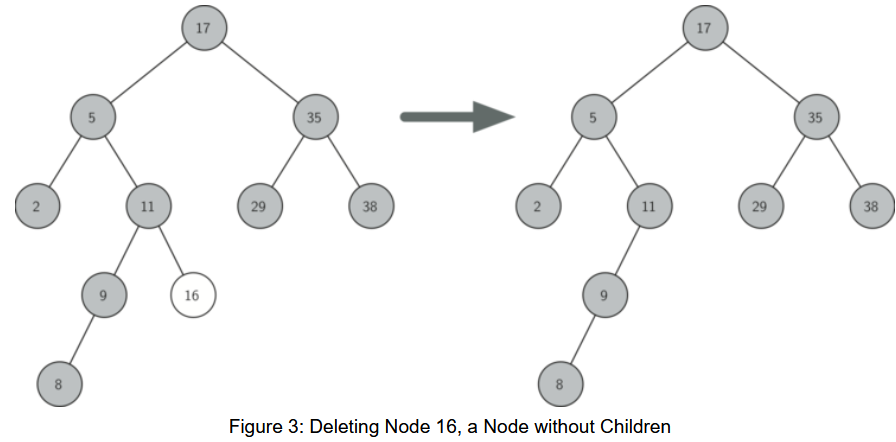

In [3]:
def remove(self, node):
    if node.isLeaf():
        if node.isLeftChild():
            node.parent.leftChild = None
        else:
            node.parent.rightChild = None

In the second case, we promote the unique child to take place of its parent

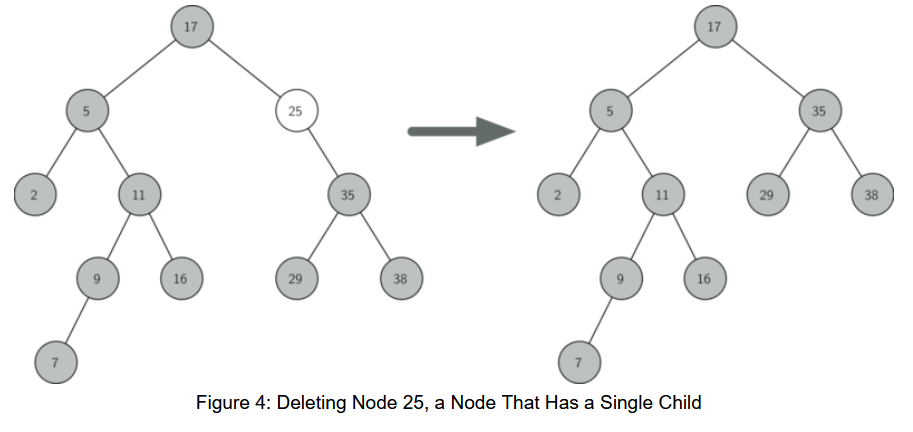

In [6]:
    def remove(self, node):
        # no children
        if node.isLeaf():
            if node.isLeftChild():
                node.parent.leftChild = None
            else:
                node.parent.rightChild = None
        
        else:
            
            # one child
            else:
                if node.hasLeftChild():
                    if node.isLeftChild():
                        node.parent.leftChild = node.leftChild
                    else:
                        node.parent.rightChild = node.leftChild

                    
                else:
                    if node.isLeftChild():
                        node.parent.leftChild = node.rightChild
                    else:
                        node.parent.rightChild = node.rightChild
                    

Finally, we take into consideration the case where the to be deleted node has two children. We search the tree for a node that can be used to replace the one scheduled for deletion. What we need to is a node that will preserve the binary search tree relationships for both of the existing left and right subtrees. <b> the node that will do this is the node that has the next-largest key in the tree </b>.

Note: it makes sense for the next-largest key to have only one child, as it can only have larger keys (and therefore, only rightchildren)

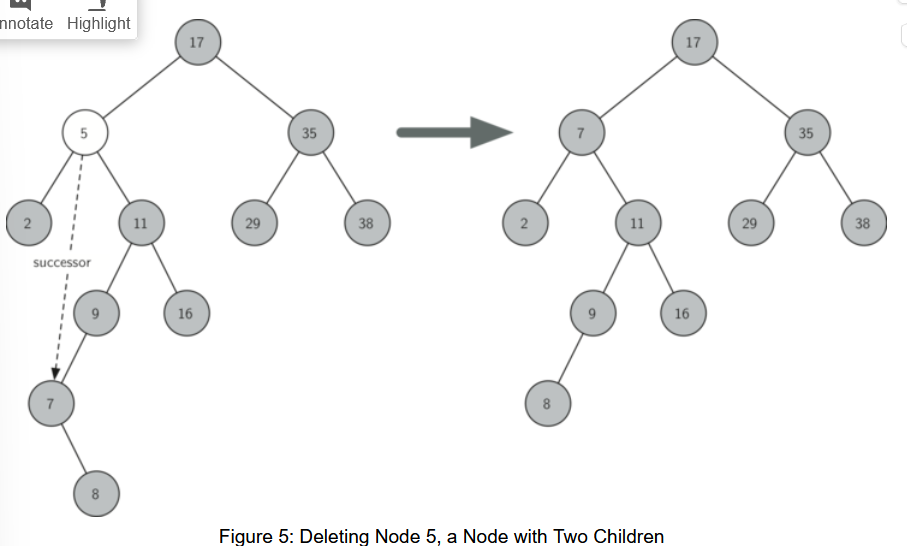

First, we define the findMin() and spliceOut() functions (for the node). Finally, we use the succession() function with help of the former functions to then delete a node with two children.

# Balanced Binary Search Trees 

The peformance of a binary search tree can degrade to O(n) for operations like get and put when the tree becomes unbalanced. the <b>AVL tree</b> makes sure the tree is always balanced. The implementation is the same as a binary search tree. To implement the AVL we need to keep track of a balance factor for each node in the tree.

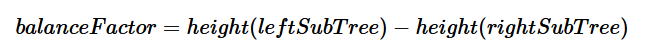

in an AVL tree, a tree will be in balance if the balance factor is -1,0 or 1. The tree works as a binary search tree, differentiating in performance.

### AVL Tree Implementationm

The insertion of a new node is always balanced, as it does not have children. However, we must update the balance factor of its parent. How this new leaf affects the parent's balance depends on if it is a left child or a right child.<b> If the new node is a left child, the balance factor of the parent will be increased by one; if the new node is a right child, the balance factor of the parent will be decreased by one</b>. This relation has to applied recursively all the way up to the root

We begin by updating the \_put method in the binary search tree, adding the updateBalance method

In [19]:
def _put(self,key,val,treeNode):

        if key == treeNode.key:
            treeNode.replaceNodeData(key,val,treeNode.leftChild,treeNode.rightChild)
            self.size -=1

        elif key < treeNode.key:
            if treeNode.hasLeftChild():
                self._put(key,val,treeNode.leftChild)
            else:
                treeNode.leftChild = TreeNode(key,val,parent=treeNode)
                self.updateBalance(currentNode.leftChild)

        else:
            if treeNode.hasRightChild():
                self._put(key,val,treeNode.rightChild)
            else:
                treeNode.rightChild = TreeNode(key,val,parent=treeNode)
                self.updateBalance(currentNode.rightChild)


In [21]:
def updateBalance(self, currentnode):
    
    if node.balance > 1 or node.balance < -1:
        self.rebalance(node)
        return
        
    if node.parent:
        if node.isLeftChild():
            node.parent.balance += 1
        
        else:
            node.parent.balance -= 1
        
        if node.parent.balance != 0:
            self.updateBalance(node.parent)
        
    
    

When a rebalancing of the tree is necessary, how do we do it? Efficient rebalancing is the key to making the AVL Tree work well without sacrificing performance. In order to bring an AVL Tree back into balance we will perform one or more rotations on the tree.


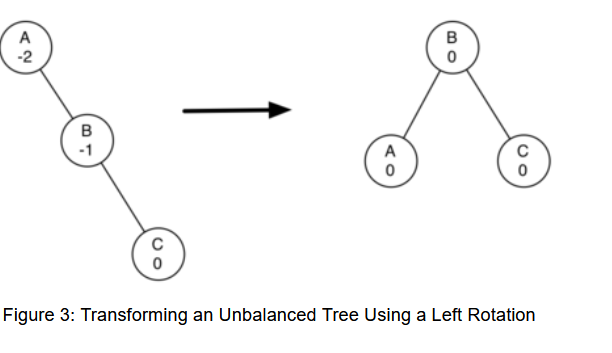

To perform a left rotation:
- Promote child B to root of subtree
- Move node A to leftchild of subtree
- If B already had a leftchild, make it the right child of the new leftchild

In [2]:
def leftRotation(self,rotRoot):
    
    newRoot = rotRoot.rightChild
    rotRoot.rightChild = newRoot.leftChild

    if newRoot.hasLeftChild():
        newRoot.leftChild.parent = rotRoot
        
    newRoot.parent = rotRoot.parent
    
    if rotRoot.isRoot():
        self.root = newRoot
    
    else:
        if rotRoot.isLeftChild():
            rotRoot.parent.leftChild = newRoot
        
        else:
            rotRoot.parent.rightChild = newRoot
    
    rotRoot.parent = newRoot

    newRoot.leftChild =  rotRoot
    
    
    rotRoot.balance = rotRoot.balance + 1 - min(newRoot.balance, 0)
    newRoot.balanceFactor = newRoot.balance + 1 + max(rotRoot.balance, 0)
    
def rightRotation(self,rotRoot):
    
    newRoot = rotRoot.leftChild
    rotRoot.leftChild = newRoot.rightChild

    if newRoot.hasRightChild():
        newRoot.rightChild.parent = rotRoot
        
    newRoot.parent = rotRoot.parent
    
    if rotRoot.isRoot():
        self.root = newRoot
    
    else:
        if rotRoot.isLeftChild():
            rotRoot.parent.leftChild = newRoot
        
        else:
            rotRoot.parent.rightChild = newRoot
    
    rotRoot.parent = newRoot

    newRoot.Child =  rotRoot
    
    
    rotRoot.balance = rotRoot.balance + 1 - min(newRoot.balance, 0)
    newRoot.balanceFactor = newRoot.balance + 1 + max(rotRoot.balance, 0)
    
    
    
        
    
    
    
    
        
    

#### Understanding the new balance

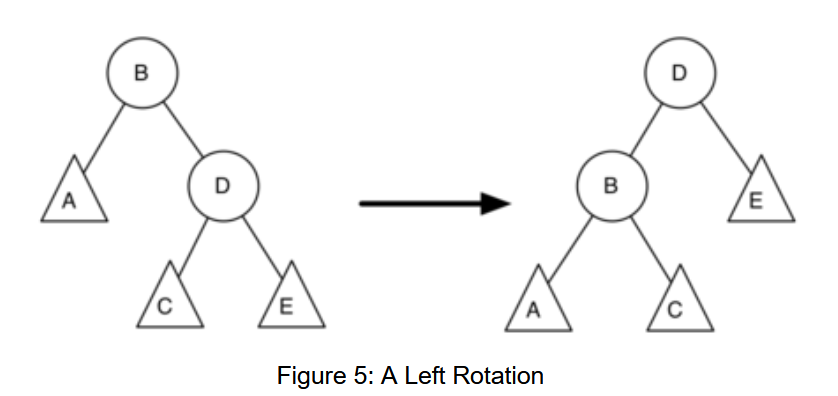

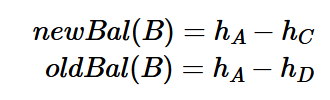

But we also have hD as 1+max(hC,hE)

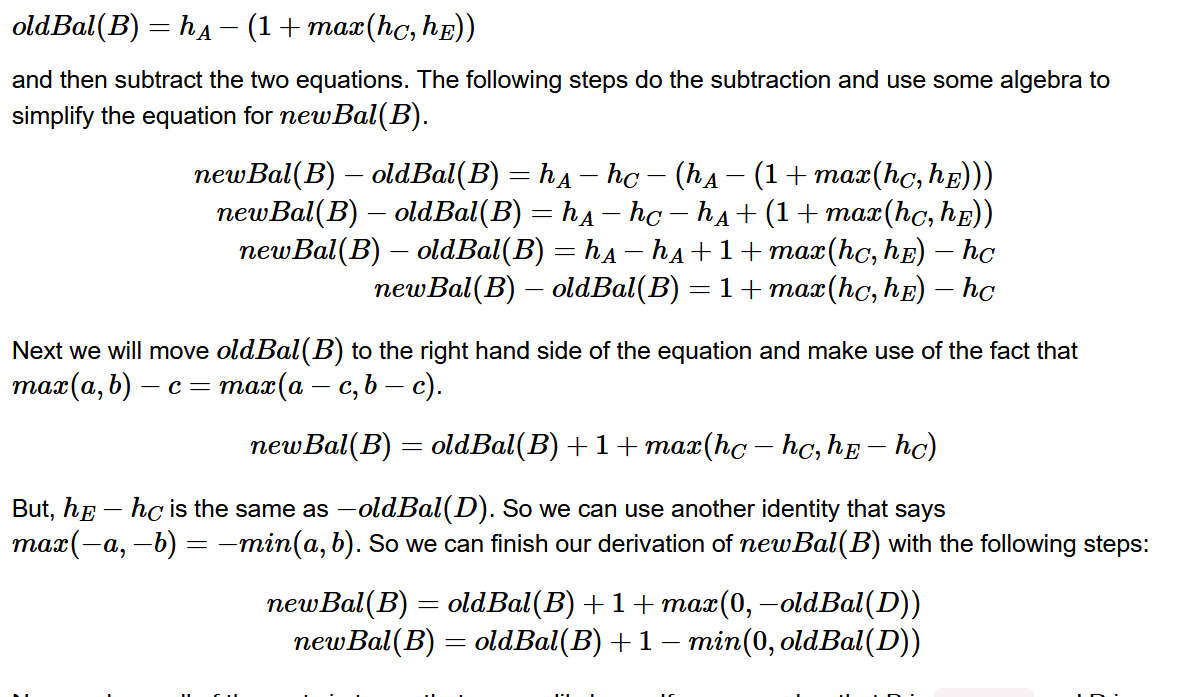

### We need to check this scenario

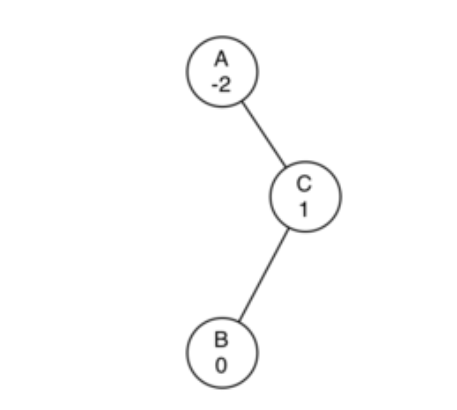

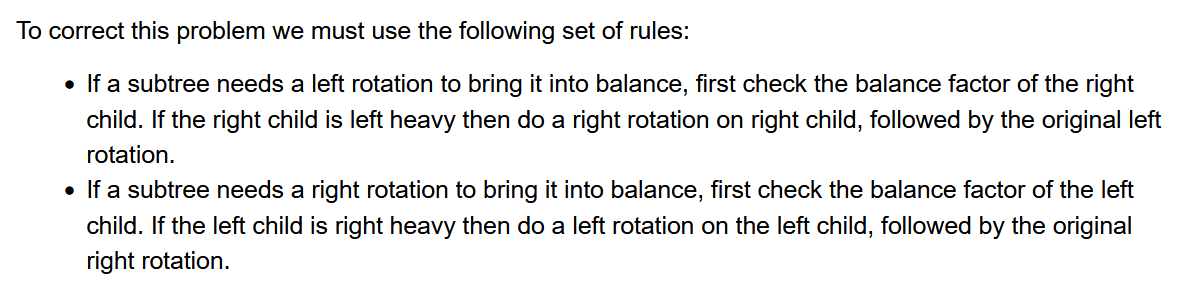

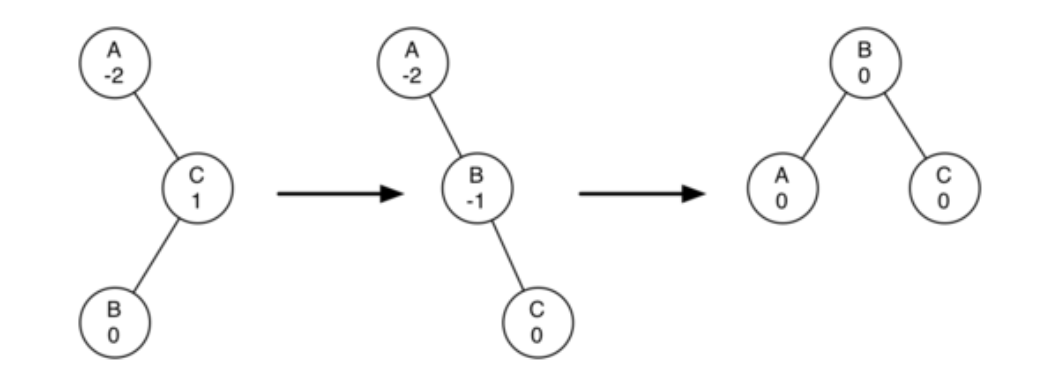

In [ ]:
def rebalance(self,node):
    
    if node.balance < 0:
        if node.rightChild.balance > 0:
            self.rotateRight(node.rightChild)
            self.rotateLeft(node)
        else:
            self.rotateLeft(node)
    elif node.balance > 0:
        if node.leftChild.balance < 0:
            self.rotateLeft(node.leftChild)
            self.rotateRight(node)
        else:
            self.rotateRight(node)

By keeping the balance of the tree at all times, we assure that the \_get method will always be O(log2(n))

In [142]:
class AVLTree:

    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return self.size

    def __len__(self):
        return self.size

    def __iter__(self):
        return self.root.__iter__()
    

    def put(self,key,val):

        if not self.root:
            self.root = TreeNode(key,val)

        else:
            self._put(key,val,self.root)

        self.size += 1

    def _put(self,key,val,treeNode):

        if key == treeNode.key:
            treeNode.replaceNodeData(key,val,treeNode.leftChild,treeNode.rightChild)
            self.size -=1

        elif key < treeNode.key:
            if treeNode.hasLeftChild():
                self._put(key,val,treeNode.leftChild)
            else:
                treeNode.leftChild = TreeNode(key,val,parent=treeNode)
                self.updateBalance(treeNode.leftChild)

        else:
            if treeNode.hasRightChild():
                self._put(key,val,treeNode.rightChild)
            else:
                treeNode.rightChild = TreeNode(key,val,parent=treeNode)
                self.updateBalance(treeNode.rightChild)

                
    def __setitem__(self,k,v):
        self.put(k,v)
        
    def get(self,key):
        
        if self.root:
            
            res = self._get(key,self.root)

            if res:
                return res.payload
            else:
                return None
        else:
            return None
    
    def _get(self,key,currentNode):
        
        if not currentNode:
            return None
        
        elif currentNode.key == key:
            return currentNode
        
        elif currentNode.key > key:
            
            return self._get(key,currentNode.leftChild)
        
        else:
            return self._get(key,currentNode.rightChild)
        
    
    def delete(self,key):
        if self.size > 1:
            node_toRemove = self._get(key,self.root)
            
            if node_toRemove: 
                self.remove(node_toRemove)
        
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size -= 1
        
        else:
            raise KeyError('Error, key not in tree')
            

            
    def remove(self, node):
        # no children
        if node.isLeaf():
            if node.isLeftChild():
                node.parent.leftChild = None
            else:
                node.parent.rightChild = None
        
        else:
            # both children
            if node.hasBothChildren():
                node.succession()
                
            # one child
            else:
                if node.hasLeftChild():
                    if node.isLeftChild():
                        node.parent.leftChild = node.leftChild
                    else:
                        node.parent.rightChild = node.leftChild

                    
                else:
                    if node.isLeftChild():
                        node.parent.leftChild = node.rightChild
                    else:
                        node.parent.rightChild = node.rightChild
        
    
    def __getitem__(self,key):
        return self.get(key)
        
    def __contains__(self,key):
        if self._get(key,self.root):
            return True
        else:
            return False
    
        
    def __delitem__(self,key):
        self.delete(key)
        
        
    def leftRotation(self,rotRoot):
    
        newRoot = rotRoot.rightChild
        rotRoot.rightChild = newRoot.leftChild

        if newRoot.hasLeftChild():
            newRoot.leftChild.parent = rotRoot

        newRoot.parent = rotRoot.parent

        if rotRoot.isRoot():
            self.root = newRoot

        else:
            if rotRoot.isLeftChild():
                rotRoot.parent.leftChild = newRoot

            else:
                rotRoot.parent.rightChild = newRoot

        rotRoot.parent = newRoot

        newRoot.leftChild =  rotRoot


        rotRoot.balance = rotRoot.balance + 1 - min(newRoot.balance, 0)
        newRoot.balanceFactor = newRoot.balance + 1 + max(rotRoot.balance, 0)
        
    def rightRotation(self,rotRoot):
    
        newRoot = rotRoot.leftChild
        rotRoot.leftChild = newRoot.rightChild

        if newRoot.hasRightChild():
            newRoot.rightChild.parent = rotRoot

        newRoot.parent = rotRoot.parent

        if rotRoot.isRoot():
            self.root = newRoot

        else:
            if rotRoot.isLeftChild():
                rotRoot.parent.leftChild = newRoot

            else:
                rotRoot.parent.rightChild = newRoot

        rotRoot.parent = newRoot

        newRoot.rightChild =  rotRoot


        rotRoot.balance = rotRoot.balance + 1 - min(newRoot.balance, 0)
        newRoot.balanceFactor = newRoot.balance + 1 + max(rotRoot.balance, 0)
    
    def rebalance(self,node):
    
        if node.balance < 0:
            if node.rightChild.balance > 0:
                self.rotateRight(node.rightChild)
                self.rotateLeft(node)
            else:
                self.rotateLeft(node)
        elif node.balance > 0:
            if node.leftChild.balance < 0:
                self.rotateLeft(node.leftChild)
                self.rotateRight(node)
            else:
                self.rotateRight(node)
                
    def updateBalance(self, node):
    
        if node.balance > 1 or node.balance < -1:
            self.rebalance(node)
            return

        if node.parent:
            if node.isLeftChild():
                node.parent.balance += 1

            else:
                node.parent.balance -= 1

            if node.parent.balance != 0:
                self.updateBalance(node.parent)

    
    

    
            
        



In [152]:
test = AVLTree()

In [153]:
for i in 'ACB':
    test[i] = 1

In [3]:
def maxprofit(prices): 
        if len(prices) == 1:
            return 0

        buyprice = prices[0]
        profit = 0

        for i in range(1,len(prices)):
            print(buyprice)
            
            if prices[i] > buyprice:
                if prices[i] - buyprice > profit: 
                    profit = prices[i] - buyprice
            
            elif prices[i] < buyprice:
                buyprice = prices[i]
        return profit



        
        


In [9]:
''.join([i.lower() for i in "A man, a plan, a canal: Panama" if i.lower() in 'abcdefghijklmnoprstuvwxyz'])

'amanaplanacanalpanama'

In [11]:
'amanaplanacanalpanama'[::-1] == 'amanaplanacanalpanama'

True

In [23]:
 def isPalindrome(s: str) -> bool:
        cleanword = ''.join([i.lower() for i in s if i.isalnum()])
        print(cleanword)
        return cleanword == cleanword[::-1]

In [25]:
isPalindrome("A ma3, a plan, a canal: Panama")

aman33aplanacanalpanama


False